In [1]:
import pandas as pd 

In [2]:
df_train=pd.read_csv(r"C:\Users\nsjag\Downloads\GUIDE_Train.csv\GUIDE_Train.csv")

In [3]:
df_test=pd.read_csv(r"C:\Users\nsjag\Downloads\GUIDE_Test.csv\GUIDE_Test.csv")

C:\Users\nsjag\AppData\Local\Temp\ipykernel_30412\845228471.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test=pd.read_csv(r"C:\Users\nsjag\Downloads\GUIDE_Test.csv\GUIDE_Test.csv")


In [97]:
df_train.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

In [5]:
df_train.shape,df_test.shape

((9516837, 45), (4147992, 46))

In [6]:
df_train.drop(['Id','IncidentId','AlertId','DetectorId','DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn','AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId','ApplicationId','FileName', 'FolderPath','RegistryKey', 'RegistryValueName','RegistryValueData','OAuthApplicationId','ResourceIdName'],axis=1,inplace=True)

In [7]:
df_test.drop(['Id','IncidentId','AlertId','DetectorId','DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn','AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId','ApplicationId','FileName', 'FolderPath','RegistryKey', 'RegistryValueName','RegistryValueData','OAuthApplicationId','ResourceIdName'],axis=1,inplace=True)

In [8]:
df_test.drop("Usage",axis=1,inplace=True)

In [9]:
df_train.shape,df_test.shape

((9516837, 23), (4147992, 23))

In [ ]:
df_train.duplicated().sum()

In [ ]:
df_test.duplicated().sum()

In [10]:
df_train.drop_duplicates(inplace=True)

In [11]:
df_test.drop_duplicates(inplace=True)

In [12]:
df_train.shape,df_test.shape

((4664195, 23), (2375303, 23))

In [107]:
df_train.isnull().sum()

OrgId                      0
Timestamp                  0
AlertTitle                 0
Category                   0
MitreTechniques      2482708
IncidentGrade          20403
ActionGrouped        4640106
ActionGranular       4640106
EntityType                 0
EvidenceRole               0
EmailClusterId       4588648
ApplicationName            0
ThreatFamily         4634319
ResourceType         4660002
Roles                4556993
OSFamily                   0
OSVersion                  0
AntispamDirection    4523693
SuspicionLevel       3778113
LastVerdict          3249085
CountryCode                0
State                      0
City                       0
dtype: int64

In [108]:
df_test.isnull().sum()

OrgId                      0
Timestamp                  0
AlertTitle                 0
Category                   0
MitreTechniques      1245272
IncidentGrade              0
ActionGrouped        2373555
ActionGranular       2373555
EntityType                 0
EvidenceRole               0
EmailClusterId       2337948
ApplicationName            0
ThreatFamily         2363071
ResourceType         2372932
Roles                2320564
OSFamily                   0
OSVersion                  0
AntispamDirection    2306414
SuspicionLevel       1933389
LastVerdict          1674180
CountryCode                0
State                      0
City                       0
dtype: int64

In [13]:
def null_value_imputer(df):
    # Handling null values
    for i in df.columns:
        if (df[i].isnull().sum() / len(df)) * 100 >=50:
            df.drop(i, axis=1, inplace=True)
        elif df[i].dtypes in ["int64", "float64"]:
            if df[i].skew() < 0.4 and df[i].skew() > -0.4:
                df[i].fillna(df[i].mean(), inplace=True)
            else:
                df[i].fillna(df[i].median(), inplace=True)
        else:
            df[i].fillna(df[i].mode()[0], inplace=True)

In [14]:
null_value_imputer(df_train)

C:\Users\nsjag\AppData\Local\Temp\ipykernel_30412\560822886.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
C:\Users\nsjag\AppData\Local\Temp\ipykernel_30412\560822886.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [15]:
null_value_imputer(df_test)

C:\Users\nsjag\AppData\Local\Temp\ipykernel_30412\560822886.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
C:\Users\nsjag\AppData\Local\Temp\ipykernel_30412\560822886.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [16]:
df_train.shape,df_test.shape

((4664195, 13), (2375303, 13))

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4664195 entries, 0 to 9516827
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   OrgId            int64 
 1   Timestamp        object
 2   AlertTitle       int64 
 3   Category         object
 4   IncidentGrade    object
 5   EntityType       object
 6   EvidenceRole     object
 7   ApplicationName  int64 
 8   OSFamily         int64 
 9   OSVersion        int64 
 10  CountryCode      int64 
 11  State            int64 
 12  City             int64 
dtypes: int64(8), object(5)
memory usage: 498.2+ MB


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375303 entries, 0 to 4147991
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   OrgId            int64 
 1   Timestamp        object
 2   AlertTitle       int64 
 3   Category         object
 4   IncidentGrade    object
 5   EntityType       object
 6   EvidenceRole     object
 7   ApplicationName  int64 
 8   OSFamily         int64 
 9   OSVersion        int64 
 10  CountryCode      int64 
 11  State            int64 
 12  City             int64 
dtypes: int64(8), object(5)
memory usage: 253.7+ MB


In [27]:
pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

In [20]:
df_train

,OrgId,Timestamp,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,OSVersion,CountryCode,State,City
0,0,2024-06-04T06:05:15.000Z,6,InitialAccess,TruePositive,Ip,Related,3421,5,66,31,6,3
1,88,2024-06-14T03:01:25.000Z,43,Exfiltration,FalsePositive,User,Impacted,3421,5,66,242,1445,10630
2,809,2024-06-13T04:52:55.000Z,298,InitialAccess,FalsePositive,Url,Related,3421,5,66,242,1445,10630
3,92,2024-06-10T16:39:36.000Z,2,CommandAndControl,BenignPositive,Url,Related,3421,5,66,242,1445,10630
4,148,2024-06-15T01:08:07.000Z,74,Execution,TruePositive,User,Impacted,3421,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516816,5,2024-06-05T16:03:26.000Z,3,InitialAccess,TruePositive,Ip,Related,3421,5,66,3,5,33
9516820,138,2024-06-07T13:18:46.000Z,75,InitialAccess,BenignPositive,MailMessage,Related,3421,5,66,242,1445,10630
9516823,470,2024-06-08T22:50:21.000Z,1,InitialAccess,BenignPositive,Url,Related,3421,5,66,242,1445,10630
9516824,369,2024-06-12T16:56:21.000Z,15,InitialAccess,FalsePositive,Ip,Related,3421,5,66,0,3,15


In [ ]:
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'])

df_train['day'] = df_train['Timestamp'].dt.day


In [ ]:
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])

df_test['day'] = df_test['Timestamp'].dt.day


In [26]:
df_train

,OrgId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,OSVersion,CountryCode,State,City,day
0,0,6,InitialAccess,TruePositive,Ip,Related,3421,5,66,31,6,3,4
1,88,43,Exfiltration,FalsePositive,User,Impacted,3421,5,66,242,1445,10630,14
2,809,298,InitialAccess,FalsePositive,Url,Related,3421,5,66,242,1445,10630,13
3,92,2,CommandAndControl,BenignPositive,Url,Related,3421,5,66,242,1445,10630,10
4,148,74,Execution,TruePositive,User,Impacted,3421,5,66,242,1445,10630,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516816,5,3,InitialAccess,TruePositive,Ip,Related,3421,5,66,3,5,33,5
9516820,138,75,InitialAccess,BenignPositive,MailMessage,Related,3421,5,66,242,1445,10630,7
9516823,470,1,InitialAccess,BenignPositive,Url,Related,3421,5,66,242,1445,10630,8
9516824,369,15,InitialAccess,FalsePositive,Ip,Related,3421,5,66,0,3,15,12


In [27]:
df_test

,OrgId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,OSVersion,CountryCode,State,City,day
0,657,563,LateralMovement,BenignPositive,User,Impacted,3421,5,66,242,1445,10630,4
1,3,2,CommandAndControl,BenignPositive,Machine,Impacted,3421,0,0,242,1445,10630,3
2,145,10807,LateralMovement,BenignPositive,Process,Related,3421,5,66,242,1445,10630,8
3,222,0,InitialAccess,FalsePositive,CloudLogonSession,Related,3421,5,66,242,1445,10630,12
4,363,18,Discovery,BenignPositive,User,Impacted,3421,5,66,242,1445,10630,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,42,7322,Malware,BenignPositive,Machine,Impacted,3421,0,0,242,1445,10630,3
4147986,358,1,InitialAccess,FalsePositive,Mailbox,Impacted,3421,5,66,242,1445,10630,10
4147987,262,120,InitialAccess,BenignPositive,User,Impacted,3421,5,66,242,1445,10630,4
4147988,1323,196,InitialAccess,BenignPositive,User,Impacted,3421,5,66,242,1445,10630,4


In [28]:
df_train.shape,df_test.shape

((4664195, 13), (2375303, 13))

In [25]:
df_train.drop("Timestamp",axis=1,inplace=True)
df_test.drop("Timestamp",axis=1,inplace=True)

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4664195 entries, 0 to 9516827
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   OrgId            int64 
 1   AlertTitle       int64 
 2   Category         object
 3   IncidentGrade    object
 4   EntityType       object
 5   EvidenceRole     object
 6   ApplicationName  int64 
 7   OSFamily         int64 
 8   OSVersion        int64 
 9   CountryCode      int64 
 10  State            int64 
 11  City             int64 
 12  day              int32 
dtypes: int32(1), int64(8), object(4)
memory usage: 480.4+ MB


In [30]:
df_train.columns

Index(['OrgId', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'ApplicationName', 'OSFamily', 'OSVersion',
       'CountryCode', 'State', 'City', 'day'],
      dtype='object')

In [35]:
df_train["AlertTitle"].value_counts()

AlertTitle
0         985182
1         390424
2         382538
3         305392
4         273974
5         227109
6         217720
8          91134
15         68433
12         66574
11         63636
17         56027
22         47982
9          32038
21         30261
39         25327
30         21832
32         21573
19         18146
31         17196
50         17078
26         16620
34         16491
23         15155
56         15016
49         14865
45         13842
37         13576
40         13425
47         13148
54         12558
62         10827
77         10111
72          9741
60          9678
48          8913
64          7373
28          7370
98          7036
80          6703
59          6495
74          6489
66          6362
115         5879
46          5622
88          5491
75          5198
55          5180
86          4890
143         4852
43          4675
100         4626
71          4467
118         4407
13          4343
97          4326
121         4176
24          4138
63 

In [37]:
def categorize_alerttitle(value):
    if value == 0:
        return 0
    elif value == 1:
        return 1
    elif value == 2:
        return 2
    elif value == 3:
        return 3
    elif value == 4:
        return 4
    elif value == 5:
        return 5
    elif value == 6:
        return 6
    else:
        return 7

# Apply the function
df_train["AlertTitle"] = df_train["AlertTitle"].apply(categorize_alerttitle)
df_test["AlertTitle"] = df_test["AlertTitle"].apply(categorize_alerttitle)


In [34]:
df_train["OrgId"].value_counts()

OrgId
0       529110
1       143959
3       120760
11      113369
8        99409
5        99108
22       54977
18       53022
9        52928
24       51495
23       48215
6        41119
38       40633
34       40571
28       39185
36       39030
35       38937
21       38810
40       35770
16       33605
26       33379
75       33127
48       32573
49       29699
62       27973
32       27760
45       27190
63       26558
13       26290
59       25429
17       24478
55       24171
56       23798
2        22031
65       21824
76       21556
50       21204
72       20600
69       19673
127      19615
42       19032
39       18536
90       18310
77       18197
51       18017
61       17978
98       16865
66       16669
54       15976
78       15803
67       15675
74       15423
117      15382
57       14733
30       14307
79       13352
68       13250
31       13237
155      13169
87       12954
102      12911
105      12502
112      12253
25       12115
46       12099
115      11856
70  

In [38]:
df_train["Category"].value_counts()

Category
InitialAccess          2690011
SuspiciousActivity      666987
CommandAndControl       408079
Exfiltration            390613
Execution               154865
CredentialAccess        134378
Malware                  75795
Discovery                33119
DefenseEvasion           22380
Impact                   21871
LateralMovement          20171
Persistence              15272
UnwantedSoftware         11682
Ransomware                8867
Collection                5041
Exploit                   2595
PrivilegeEscalation       2389
CredentialStealing          43
WebExploit                  34
Weaponization                3
Name: count, dtype: int64

In [39]:
df_train["IncidentGrade"].value_counts()

IncidentGrade
TruePositive      1992017
BenignPositive    1743622
FalsePositive      928556
Name: count, dtype: int64

In [43]:
df_train["EntityType"].value_counts()

EntityType
User                 1126978
Ip                    846738
others                533091
CloudLogonRequest     467223
MailMessage           370802
Machine               335677
Mailbox               296282
Url                   264664
Process               221183
File                  201557
Name: count, dtype: int64

In [42]:
def categorize_entitytype(value):
    if value == "User":
        return "User"
    elif value == "Ip":
        return  "Ip"
    elif value == "CloudLogonRequest":
        return "CloudLogonRequest"
    elif value == "MailMessage":
        return "MailMessage"
    elif value == "Machine":
        return "Machine"
    elif value == "Mailbox":
        return "Mailbox"
    elif value =="Url" :
        return "Url"
    elif value =="Process" :
        return "Process" 
    elif value =="File" :
        return "File"
    else:
        return "others"

# Apply the function
df_train["EntityType"] = df_train["EntityType"].apply(categorize_entitytype)
df_test["EntityType"] = df_test["EntityType"].apply(categorize_entitytype)


In [44]:
df_train["EvidenceRole"].value_counts()

EvidenceRole
Related     2616384
Impacted    2047811
Name: count, dtype: int64

In [43]:
df_train.value_counts()

OrgId  AlertTitle  Category            IncidentGrade   EntityType         EvidenceRole  ApplicationName  OSFamily  OSVersion  CountryCode  State  City   year  day  day_of_week  time_of_day  season
0      0           InitialAccess       TruePositive    CloudLogonRequest  Related       3421             5         66         242          1445   10630  2024  8    5            Evening      Summer    4529
                                                       User               Impacted      3421             5         66         242          1445   10630  2024  8    5            Evening      Summer    4529
                                                       CloudLogonRequest  Related       3421             5         66         242          1445   10630  2024  9    6            Night        Summer    4208
                                                       User               Impacted      3421             5         66         242          1445   10630  2024  9    6            Night      

In [45]:
df_train["OSFamily"].value_counts()

OSFamily
5    4506668
0     153974
1       2211
2       1334
3          7
4          1
Name: count, dtype: int64

In [46]:
df_test["OSFamily"].value_counts()

OSFamily
5    2298502
0      75174
1        901
2        721
3          5
Name: count, dtype: int64

In [47]:
df_train["OSVersion"].value_counts()

OSVersion
66    4506675
0      151774
2        1502
1        1445
3         997
4         553
6         289
5         240
8         121
9         103
7          74
10         66
12         46
11         43
13         32
14         26
16         22
15         22
19         18
17         17
21         14
22         13
20         12
24         10
25          7
26          7
27          6
28          5
31          5
35          4
42          3
40          3
33          3
41          3
37          3
38          3
29          3
46          2
23          2
34          2
30          2
44          2
47          1
51          1
52          1
45          1
62          1
56          1
48          1
64          1
63          1
43          1
36          1
58          1
65          1
59          1
53          1
60          1
Name: count, dtype: int64

In [48]:
def categorize_osversion(value):
    if value == 66:
        return 0
    elif value == 0:
        return 1
    elif value == 2:
        return 2
    elif value == 1:
        return 3
    elif value == 3:
        return 4
    else:
        return 5

# Apply the function



In [49]:
df_train["OSVersionnew"] = df_train["OSVersion"].apply(categorize_osversion)
df_test["OSVersionnew"] = df_test["OSVersion"].apply(categorize_osversion)

In [50]:
df_train.drop("OSVersion",axis=1,inplace=True)

In [51]:
df_test.drop("OSVersion",axis=1,inplace=True)

In [52]:
df_train["CountryCode"].value_counts()

CountryCode
242    4107437
0       133760
1        72362
2        45924
4        28021
3        26258
5        21604
6        17681
8        14492
7        14157
10       12255
12       11198
9        11046
11       10826
13       10184
14        9237
17        8004
15        7463
16        7126
18        6465
19        5236
20        5085
21        5063
22        4413
23        4266
24        3509
25        3103
26        3038
28        2851
29        2666
27        2573
30        2549
33        2252
31        1994
32        1984
35        1757
34        1711
37        1648
38        1633
36        1527
40        1403
47        1396
41        1319
39        1275
42        1236
43        1114
44        1081
46        1051
50        1041
45        1018
48         923
49         779
52         762
51         737
53         733
57         685
55         656
54         654
56         564
58         561
60         510
59         509
63         508
65         488
61         467
62         45

In [56]:
df_train["CountryCode"].nunique()

6

In [54]:
def categorize_countrycode(value):
    if value == 242:
        return 0
    elif value == 0:
        return 1
    elif value == 1:
        return 2
    elif value == 2:
        return 3
    elif value == 4:
        return 4
    else:
        return 5

In [55]:
df_train["CountryCode"] = df_train["CountryCode"].apply(categorize_countrycode)
df_test["CountryCode"] = df_test["CountryCode"].apply(categorize_countrycode)

In [60]:
df_train["State"].value_counts()

State
0    4193463
5     329755
1      70336
2      29230
3      23794
4      17617
Name: count, dtype: int64

In [58]:
def categorize_state(value):
    if value == 1445:
        return 0
    elif value == 0:
        return 1
    elif value == 1:
        return 2
    elif value == 2:
        return 3
    elif value == 3:
        return 4
    else:
        return 5

In [59]:
df_train["State"] = df_train["State"].apply(categorize_state)
df_test["State"] = df_test["State"].apply(categorize_state)

In [61]:
df_train["City"].value_counts()

City
10630    4192940
0          69936
1          15451
2          14952
3          13446
4          11016
5          10311
6           8931
13          8691
7           8118
14          7598
9           7397
8           6737
12          6178
11          6132
10          6099
15          5684
18          5230
16          5003
20          5003
23          4834
22          4723
24          4681
25          4565
17          4453
19          4437
21          4139
28          3765
26          3414
27          3359
29          3168
36          2938
30          2867
31          2702
40          2661
32          2583
35          2514
37          2488
38          2425
34          2421
41          2364
42          2184
33          2157
39          2107
50          2021
45          1960
43          1906
44          1832
47          1817
46          1754
48          1687
53          1674
52          1585
56          1574
51          1466
55          1456
54          1451
73          1358
70       

In [65]:
df_train["ApplicationName"].value_counts()

ApplicationName
3421    4500680
0         45333
1         29347
2         26456
3         22445
4         16548
5          5890
7          2199
6          1696
8          1500
10          600
9           589
12          576
11          480
13          374
14          307
15          257
16          241
17          230
19          192
18          179
21          174
20          169
23          120
22          100
24           97
27           87
25           83
30           79
26           74
37           72
29           71
35           69
39           66
31           66
38           66
28           64
34           63
42           62
44           59
32           59
46           58
33           52
52           52
41           51
56           51
47           51
54           48
48           48
43           47
45           46
50           46
36           45
59           42
49           41
51           41
61           40
58           38
60           37
40           37
67           36
71      

In [67]:
def categorize_name(value):
    if value == 3421:
        return 0
    elif value == 0:
        return 1
    elif value == 1:
        return 2
    elif value == 2:
        return 3
    elif value == 3:
        return 4
    else:
        return 5

In [68]:
df_train["ApplicationName"] = df_train["ApplicationName"].apply(categorize_name)
df_test["ApplicationName"] = df_test["ApplicationName"].apply(categorize_name)

In [63]:
def categorize_city(value):
    if value == 10630:
        return 0
    elif value == 0:
        return 1
    elif value == 1:
        return 2
    elif value == 2:
        return 3
    elif value == 3:
        return 4
    else:
        return 5

In [64]:
df_train["City"] = df_train["City"].apply(categorize_city)
df_test["City"] = df_test["City"].apply(categorize_city)

In [ ]:
df_train

In [142]:
df_test

,OrgId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,CountryCode,State,City,year,day,day_of_week,time_of_day,season,OSVersionnew
0,657,563,LateralMovement,BenignPositive,User,Impacted,3421,5,0,0,0,2024,4,1,Evening,Summer,1
1,3,2,CommandAndControl,BenignPositive,Machine,Impacted,3421,0,0,0,0,2024,3,0,Afternoon,Summer,3
2,145,10807,LateralMovement,BenignPositive,Process,Related,3421,5,0,0,0,2024,8,5,Night,Summer,1
3,222,0,InitialAccess,FalsePositive,CloudLogonSession,Related,3421,5,0,0,0,2024,12,2,Afternoon,Summer,1
4,363,18,Discovery,BenignPositive,User,Impacted,3421,5,0,0,0,2024,6,3,Afternoon,Summer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,42,7322,Malware,BenignPositive,Machine,Impacted,3421,0,0,0,0,2024,3,0,Evening,Summer,3
4147986,358,1,InitialAccess,FalsePositive,Mailbox,Impacted,3421,5,0,0,0,2024,10,0,Afternoon,Summer,1
4147987,262,120,InitialAccess,BenignPositive,User,Impacted,3421,5,0,0,0,2024,4,1,Night,Summer,1
4147988,1323,196,InitialAccess,BenignPositive,User,Impacted,3421,5,0,0,0,2024,4,1,Evening,Summer,1


In [72]:
df_train.shape,df_test.shape

((4664195, 13), (2375303, 13))

In [73]:
df_train.columns

Index(['OrgId', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'ApplicationName', 'OSFamily', 'CountryCode', 'State',
       'City', 'day', 'OSVersionnew'],
      dtype='object')

In [74]:
df_train.to_csv("trainedlast.csv",index=False)

In [75]:
df_test.to_csv("testedlast.csv",index=False)

In [2]:
import pandas as pd

In [4]:
df_train=pd.read_csv("trainedlast.csv")
df_test=pd.read_csv("testedlast.csv")

In [5]:
df_train.shape,df_test.shape

((4664195, 13), (2375303, 13))

In [78]:
import matplotlib.pyplot as plt

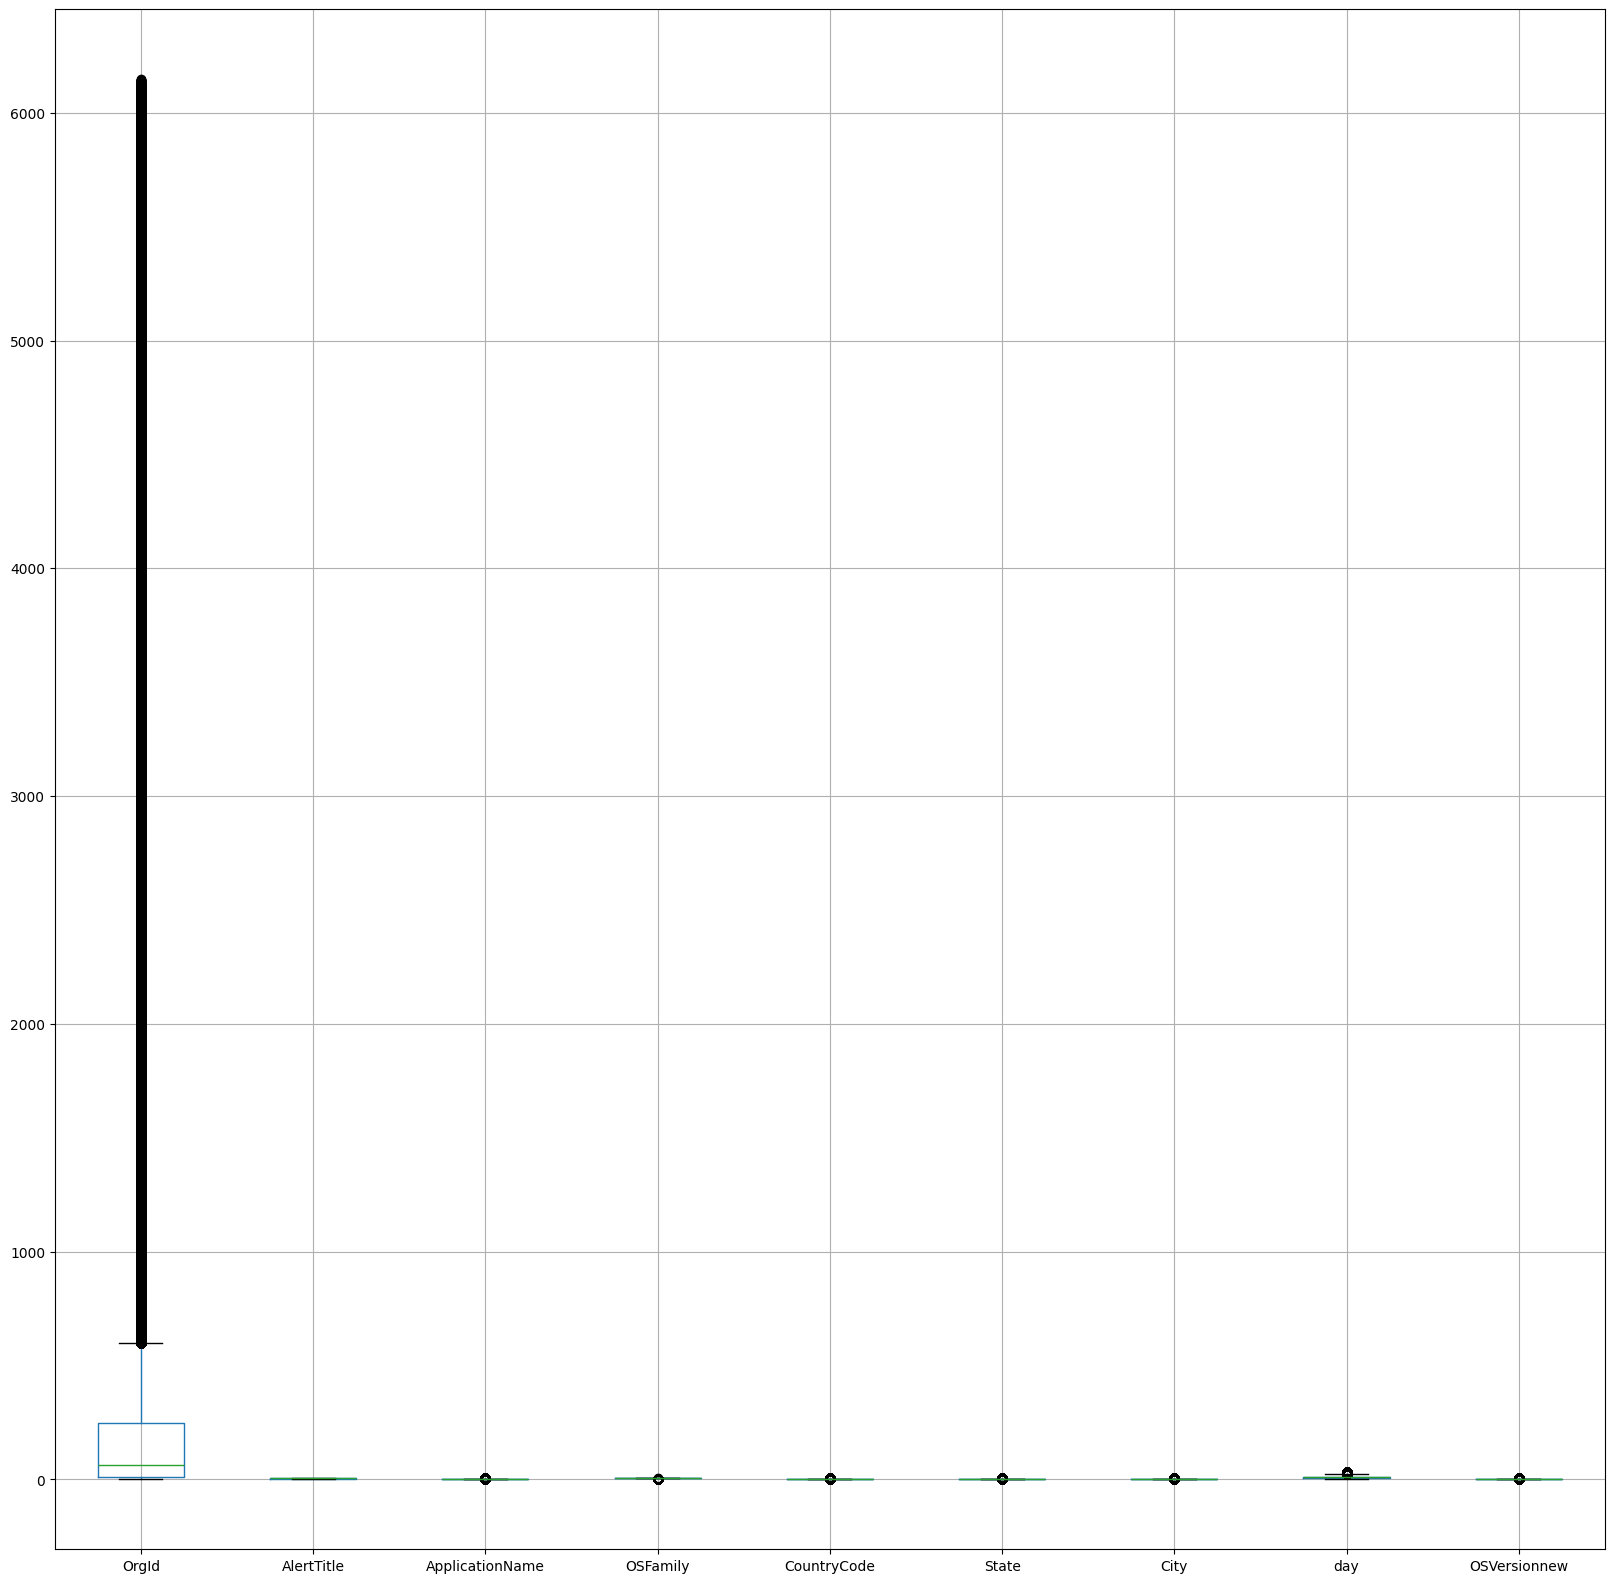

In [79]:
plt.figure(figsize=(20,20))
df_train.boxplot()
plt.show()

In [82]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a1/35/c2de8823211d07e8a79ab018ef03960716c5dff6f4d5bff5af87fd682992/contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb31


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Identify rows where OSFamily == 1
rows_to_drop = df_train[df_train['OSFamily'] == 4].index

# Drop the rows
df_train = df_train.drop(rows_to_drop)



In [6]:
# Identify rows where OSFamily == 1
rows_to_drop = df_train[df_train['Category'] =="Weaponization"].index

# Drop the rows
df_train = df_train.drop(rows_to_drop)

In [87]:
import seaborn as sns

In [8]:
# Removing outliers using IQR method
for col in df_train.select_dtypes(include=['int64']).columns:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

        # Filter the data to remove outliers
    df_trainnew = df_train[(df_train[col] >= lower_bound) & (df_train[col] <= upper_bound)]

In [9]:
for col in df_test.select_dtypes(include=['int64']).columns:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

        # Filter the data to remove outliers
    df_testnew = df_test[(df_test[col] >= lower_bound) & (df_test[col] <= upper_bound)]

In [10]:
df_train.shape,df_test.shape

((4664191, 13), (2375303, 13))

In [11]:
df_trainnew.shape,df_testnew.shape

((4506672, 13), (2298507, 13))

In [12]:
df_trainnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4506672 entries, 0 to 4664194
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   OrgId            int64 
 1   AlertTitle       int64 
 2   Category         object
 3   IncidentGrade    object
 4   EntityType       object
 5   EvidenceRole     object
 6   ApplicationName  int64 
 7   OSFamily         int64 
 8   CountryCode      int64 
 9   State            int64 
 10  City             int64 
 11  day              int64 
 12  OSVersionnew     int64 
dtypes: int64(9), object(4)
memory usage: 481.4+ MB


In [13]:
df_trainnew.drop("day",axis=1,inplace=True)

C:\Users\nsjag\AppData\Local\Temp\ipykernel_39796\1452687637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trainnew.drop("day",axis=1,inplace=True)


In [14]:
df_testnew.drop("day",axis=1,inplace=True)

C:\Users\nsjag\AppData\Local\Temp\ipykernel_39796\2778489052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testnew.drop("day",axis=1,inplace=True)


In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
enc=LabelEncoder()
enc1=OneHotEncoder()


In [16]:
for i in df_trainnew[["IncidentGrade","EntityType","EvidenceRole"]]:
    df_trainnew[i]=enc.fit_transform(df_trainnew[i])

C:\Users\nsjag\AppData\Local\Temp\ipykernel_39796\2764778284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trainnew[i]=enc.fit_transform(df_trainnew[i])
C:\Users\nsjag\AppData\Local\Temp\ipykernel_39796\2764778284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trainnew[i]=enc.fit_transform(df_trainnew[i])
C:\Users\nsjag\AppData\Local\Temp\ipykernel_39796\2764778284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [17]:
columns_to_encode=["AlertTitle","Category","ApplicationName","OSFamily","CountryCode","State","City","OSVersionnew"]


df_trainnew = pd.get_dummies(df_trainnew, columns=columns_to_encode, prefix=columns_to_encode)

In [18]:
columns_to_encode=["AlertTitle","Category","ApplicationName","OSFamily","CountryCode","State","City","OSVersionnew"]


df_testnew = pd.get_dummies(df_testnew, columns=columns_to_encode, prefix=columns_to_encode)

In [19]:
for i in df_testnew[["IncidentGrade","EntityType","EvidenceRole"]]:
    df_testnew[i]=enc.fit_transform(df_testnew[i])

In [20]:
df_trainnew.shape,df_testnew.shape

((4506672, 58), (2298507, 58))

In [21]:
df_trainnew.head(2)

,OrgId,IncidentGrade,EntityType,EvidenceRole,AlertTitle_0,AlertTitle_1,AlertTitle_2,AlertTitle_3,AlertTitle_4,AlertTitle_5,...,State_3,State_4,State_5,City_0,City_1,City_2,City_3,City_4,City_5,OSVersionnew_0
0,0,2,2,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1,88,1,8,0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [22]:
df_testnew.head(2)

,OrgId,IncidentGrade,EntityType,EvidenceRole,AlertTitle_0,AlertTitle_1,AlertTitle_2,AlertTitle_3,AlertTitle_4,AlertTitle_5,...,State_3,State_4,State_5,City_0,City_1,City_2,City_3,City_4,City_5,OSVersionnew_0
0,657,0,8,0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,145,0,6,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [23]:
df_trainnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4506672 entries, 0 to 4664194
Data columns (total 58 columns):
 #   Column                        Dtype
---  ------                        -----
 0   OrgId                         int64
 1   IncidentGrade                 int64
 2   EntityType                    int64
 3   EvidenceRole                  int64
 4   AlertTitle_0                  bool 
 5   AlertTitle_1                  bool 
 6   AlertTitle_2                  bool 
 7   AlertTitle_3                  bool 
 8   AlertTitle_4                  bool 
 9   AlertTitle_5                  bool 
 10  AlertTitle_6                  bool 
 11  AlertTitle_7                  bool 
 12  Category_Collection           bool 
 13  Category_CommandAndControl    bool 
 14  Category_CredentialAccess     bool 
 15  Category_CredentialStealing   bool 
 16  Category_DefenseEvasion       bool 
 17  Category_Discovery            bool 
 18  Category_Execution            bool 
 19  Category_Exfiltration     

In [24]:
# Convert all boolean columns to integers
df_trainnew[df_trainnew.select_dtypes(include=['bool']).columns] = df_trainnew.select_dtypes(include=['bool']).astype(int)


In [25]:
# Convert all boolean columns to integers
df_testnew[df_testnew.select_dtypes(include=['bool']).columns] = df_testnew.select_dtypes(include=['bool']).astype(int)


In [26]:
x=df_trainnew.drop("IncidentGrade",axis=1)
y=df_trainnew["IncidentGrade"]

In [27]:
x.shape,y.shape

((4506672, 57), (4506672,))

In [28]:
y.value_counts()

IncidentGrade
2    1966439
0    1640070
1     900163
Name: count, dtype: int64

In [22]:
pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---------------------- ----------------- 143.4/258.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd

# Assuming df is your dataset
df_sample = df_trainnew.sample(frac=0.1, random_state=42)

# Splitting into features and target
x= df_sample.drop('IncidentGrade', axis=1)
y= df_sample['IncidentGrade']


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450667 entries, 2396599 to 4184062
Data columns (total 57 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   OrgId                         450667 non-null  int64
 1   EntityType                    450667 non-null  int64
 2   EvidenceRole                  450667 non-null  int64
 3   AlertTitle_0                  450667 non-null  int64
 4   AlertTitle_1                  450667 non-null  int64
 5   AlertTitle_2                  450667 non-null  int64
 6   AlertTitle_3                  450667 non-null  int64
 7   AlertTitle_4                  450667 non-null  int64
 8   AlertTitle_5                  450667 non-null  int64
 9   AlertTitle_6                  450667 non-null  int64
 10  AlertTitle_7                  450667 non-null  int64
 11  Category_Collection           450667 non-null  int64
 12  Category_CommandAndControl    450667 non-null  int64
 13  Category_Cre

In [29]:
y.info()

<class 'pandas.core.series.Series'>
Index: 450667 entries, 2396599 to 4184062
Series name: IncidentGrade
Non-Null Count   Dtype
--------------   -----
450667 non-null  int64
dtypes: int64(1)
memory usage: 6.9 MB


In [30]:
x.shape,y.shape

((450667, 57), (450667,))

In [31]:
y.value_counts()

IncidentGrade
2    196686
0    164203
1     89778
Name: count, dtype: int64

In [87]:
x.describe()

,OrgId,EntityType,EvidenceRole,AlertTitle_0,AlertTitle_1,AlertTitle_2,AlertTitle_3,AlertTitle_4,AlertTitle_5,AlertTitle_6,...,State_3,State_4,State_5,City_0,City_1,City_2,City_3,City_4,City_5,OSVersionnew_0
count,450667.000000,450667.000000,450667.000000,450667.000000,450667.000000,450667.000000,450667.000000,450667.000000,450667.000000,450667.000000,...,450667.000000,450667.000000,450667.000000,450667.000000,450667.000000,450667.000000,450667.000000,450667.000000,450667.000000,450667.0
mean,239.718728,4.963794,0.580320,0.217675,0.086802,0.063570,0.067602,0.061369,0.050452,0.048433,...,0.005084,0.004016,0.073116,0.895309,0.015719,0.003397,0.003151,0.002938,0.079487,1.0
std,475.768838,3.106730,0.493507,0.412666,0.281546,0.243986,0.251062,0.240006,0.218876,0.214679,...,0.071118,0.063247,0.260327,0.306156,0.124386,0.058186,0.056044,0.054122,0.270497,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,63.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,247.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,6147.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [86]:
df_trainnew.describe()

,OrgId,IncidentGrade,EntityType,EvidenceRole,AlertTitle_0,AlertTitle_1,AlertTitle_2,AlertTitle_3,AlertTitle_4,AlertTitle_5,...,State_3,State_4,State_5,City_0,City_1,City_2,City_3,City_4,City_5,OSVersionnew_0
count,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,...,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4.506672e+06,4506672.0
mean,2.396771e+02,1.072419e+00,4.967635e+00,5.805574e-01,2.186052e-01,8.663244e-02,6.356731e-02,6.776442e-02,6.079298e-02,5.039395e-02,...,5.279727e-03,3.909093e-03,7.317040e-02,8.954317e-01,1.551832e-02,3.428472e-03,3.317748e-03,2.983576e-03,7.932017e-02,1.0
std,4.739043e+02,8.916365e-01,3.108856e+00,4.934679e-01,4.133001e-01,2.812957e-01,2.439806e-01,2.513412e-01,2.389502e-01,2.187565e-01,...,7.246967e-02,6.240042e-02,2.604160e-01,3.059964e-01,1.236022e-01,5.845270e-02,5.750427e-02,5.454058e-02,2.702379e-01,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,1.100000e+01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,6.400000e+01,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
75%,2.470000e+02,2.000000e+00,8.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
max,6.147000e+03,2.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0


In [36]:
y.value_counts()

IncidentGrade
2    196686
0    164203
1     89778
Name: count, dtype: int64

In [38]:
from imblearn.combine import SMOTETomek

# Example usage:
smote_tomek = SMOTETomek(random_state=42)
x_new, y_new= smote_tomek.fit_resample(x,y)



In [34]:
y_new.value_counts()

IncidentGrade
0                196381
2                196324
1                196313
Name: count, dtype: int64

In [41]:
x_new.to_csv("x_sample.csv",index=False)

In [42]:
y_new.to_csv("y_sample.csv",index=False)

In [32]:
import pandas as pd
x_new=pd.read_csv("x_sample.csv")
y_new=pd.read_csv("y_sample.csv")

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [36]:
df_test2 = df_testnew.sample(frac=0.1, random_state=42)
x_test=df_test2.drop("IncidentGrade",axis=1)
y_test=df_test2["IncidentGrade"]

In [45]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229851 entries, 1432134 to 2314443
Data columns (total 57 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   OrgId                         229851 non-null  int64
 1   EntityType                    229851 non-null  int64
 2   EvidenceRole                  229851 non-null  int64
 3   AlertTitle_0                  229851 non-null  int64
 4   AlertTitle_1                  229851 non-null  int64
 5   AlertTitle_2                  229851 non-null  int64
 6   AlertTitle_3                  229851 non-null  int64
 7   AlertTitle_4                  229851 non-null  int64
 8   AlertTitle_5                  229851 non-null  int64
 9   AlertTitle_6                  229851 non-null  int64
 10  AlertTitle_7                  229851 non-null  int64
 11  Category_Collection           229851 non-null  int64
 12  Category_CommandAndControl    229851 non-null  int64
 13  Category_Cre

In [37]:
x_train,x_val,y_train,y_val=train_test_split(x_new,y_new,test_size=0.2,random_state=42)


In [38]:
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print('Classification_report:',classification_report(y_test,y_pred))



c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy: 0.919091063341034
Classification_report:               precision    recall  f1-score   support

           0       0.93      0.93      0.93     79460
           1       0.82      0.89      0.86     43191
           2       0.96      0.92      0.94    107200

    accuracy                           0.92    229851
   macro avg       0.90      0.91      0.91    229851
weighted avg       0.92      0.92      0.92    229851



In [39]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(random_state=42)
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print('Classification_report:',classification_report(y_test,y_pred))

accuracy: 0.9273833918495025
Classification_report:               precision    recall  f1-score   support

           0       0.93      0.94      0.93     79460
           1       0.84      0.90      0.87     43191
           2       0.96      0.93      0.95    107200

    accuracy                           0.93    229851
   macro avg       0.91      0.92      0.92    229851
weighted avg       0.93      0.93      0.93    229851



In [86]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 667.8 kB/s eta 0:03:07
   ---------------------------------------- 0.4/124.9 MB 3.9 MB/s eta 0:00:32
   ---------------------------------------- 0.9/124.9 MB 6.0 MB/s eta 0:00:21
   ---------------------------------------- 1.4/124.9 MB 7.0 MB/s eta 0:00:18
    --------------------------------------- 1.9/124.9 MB 8.1 MB/s eta 0:00:16
    --------------------------------------- 2.4/124.9 MB 8.1 MB/s eta 0:00:16
    --------------------------------------- 2.9/124.9 MB 8.6 MB/s eta 0:00:15
   - -------------------------------------- 3.5/124.9 MB 9.2 MB/s eta 0:00:14
   - ----------------------


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the XGBoost model
model3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model3.fit(x_train, y_train)

# Make predictions
y_pred = model3.predict(x_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:50:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8423674467372341
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85     79460
           1       0.65      0.86      0.74     43191
           2       0.96      0.82      0.89    107200

    accuracy                           0.84    229851
   macro avg       0.82      0.85      0.83    229851
weighted avg       0.86      0.84      0.85    229851



In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the MLP model
model4 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
model4.fit(x_train, y_train)

# Make predictions
y_pred = model4.predict(x_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.7546410500715681
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76     79460
           1       0.54      0.73      0.62     43191
           2       0.92      0.75      0.82    107200

    accuracy                           0.75    229851
   macro avg       0.73      0.75      0.73    229851
weighted avg       0.78      0.75      0.76    229851



In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
128 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\sklearn\base.py", li

Best Parameters: {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9318016878549127


In [ ]:
optimized_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
optimized_model.fit(x_train, y_train)
y_pred_optimized = optimized_model.predict(x_test)
print('Tuned Accuracy:', accuracy_score(y_test, y_pred_optimized))


c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Tuned Accuracy: 0.9191389204310618


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],  # Corrected 'max_features'
    'bootstrap': [True, False]
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(x_train, y_train)  # Ensure y_train is 1D

# Get the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9318016878549127


In [46]:
optimized_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
optimized_model.fit(x_train, y_train)
y_pred_optimized = optimized_model.predict(x_test)
print('Tuned Accuracy:', accuracy_score(y_test, y_pred_optimized))


c:\Users\nsjag\streamlit\env\Scripts\__pycache__\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Tuned Accuracy: 0.9191389204310618
